# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''


'\n!pip install pycountry_convert \n!pip install folium\n!pip install seaborn\n!pip install plotly\n'

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [4]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/13/20  11/14/20  11/15/20  \
0        0        0        0        0  ...     42969     43035     43240   
1        0        0        0        0  ...     26701     27233     27830   
2        0        0        0        0  ...     65975     66819     67679   
3        0        0        0        0  ...      5725      5725      5872   
4        0        0        0        0  ...     13228     13374     13451   

   11/16/20  11/17/20  11/18/20  11/19/20  11/20/20  11/21/20  11/22/20  
0     43403     43628     43851     44228     44443     44503     44706  
1     28432     29126     29837     30623     31459     32196     32761  
2     68589     69591     70629     71652     72755     73774     74862  
3      5914      5951      6018      6066      6142      6207      6256  
4     13615     13818     13922     14134     14267     14413     14493  

[5 rows x 310 columns]

In [5]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/13/20  11/14/20  11/15/20  \
0        0        0        0        0  ...      1595      1605      1617   
1        0        0        0        0  ...       605       612       623   
2        0        0        0        0  ...      2124      2139      2154   
3        0        0        0        0  ...        75        75        76   
4        0        0        0        0  ...       317       322       322   

   11/16/20  11/17/20  11/18/20  11/19/20  11/20/20  11/21/20  11/22/20  
0      1626      1638      1645      1650      1661      1675      1687  
1       631       637       646       657       672       685       699  
2      2168      2186      2206      2224      2236      2255      2272  
3        76        76        76        76        76        76        76  
4       324       328       332       333       334       336       337  

[5 rows x 310 columns]

In [6]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/13/20  11/14/20  11/15/20  \
0        0        0        0        0  ...     35036     35067     35092   
1        0        0        0        0  ...     12667     12767     12889   
2        0        0        0        0  ...     43779     44199     44633   
3        0        0        0        0  ...      4675      4675      4747   
4        0        0        0        0  ...      6326      6345      6444   

   11/16/20  11/17/20  11/18/20  11/19/20  11/20/20  11/21/20  11/22/20  
0     35137     35160     35295     35350     35370     35422     35934  
1     13453     13804     14216     14565     15055     15469     15842  
2     45148     45148     46326     46962     47581     48183     48794  
3      4830      4965      5055      5127      5239      5290      5358  
4      6523      6582      6623      7062      7117      7273      7346  

[5 rows x 310 columns]

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [7]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Insert your code here:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    deaths_sum = deaths[i].sum()
    recoveries_sum = recoveries[i].sum()
    
    total_cases.append(confirmed_sum)
    total_deaths.append(deaths_sum)
    total_recovered.append(recoveries_sum)
#Active = Confirmed - Deaths - Recoveries
    total_active.append(confirmed_sum - deaths_sum - recoveries_sum)
    

   
    
    

In [8]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  58649324
Total death cases:  1388068
Total recoveries cases:  37486362
Total active cases:  19774894


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

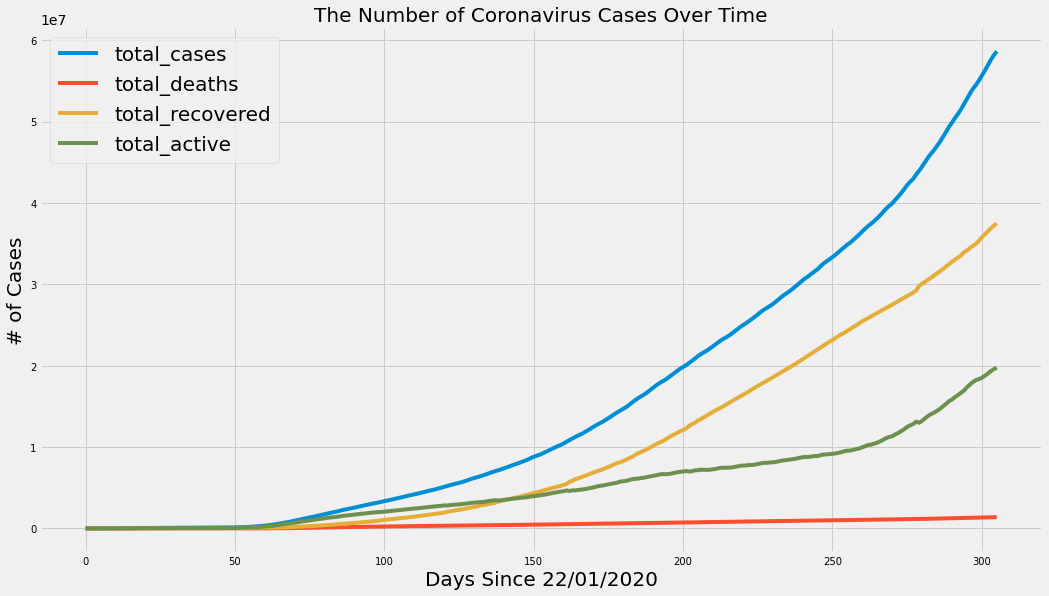

In [9]:
#Insert your code here:

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_cases)
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, total_active)
plt.title('The Number of Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since 22/01/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.legend(['total_cases', 'total_deaths', 'total_recovered', 'total_active'], prop={'size': 20})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(total_cases))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.plot(adjusted_dates, np.log10(total_active))
plt.title('Log of # of Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since 22/01/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.legend(['total_cases', 'total_deaths', 'total_recovered', 'total_active'], prop={'size': 20})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()



## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.
    

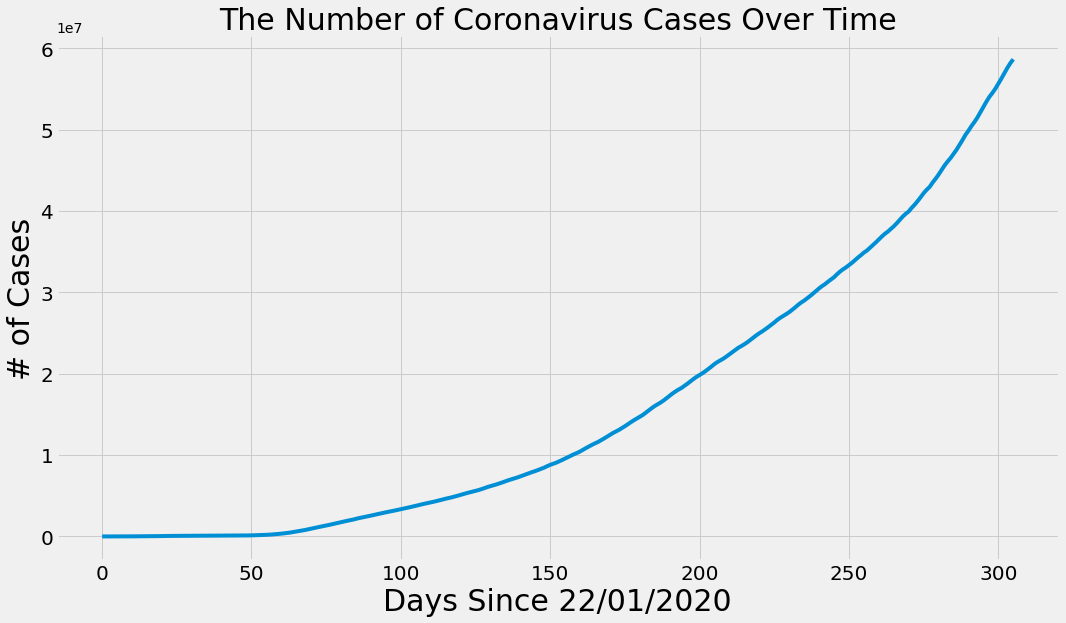

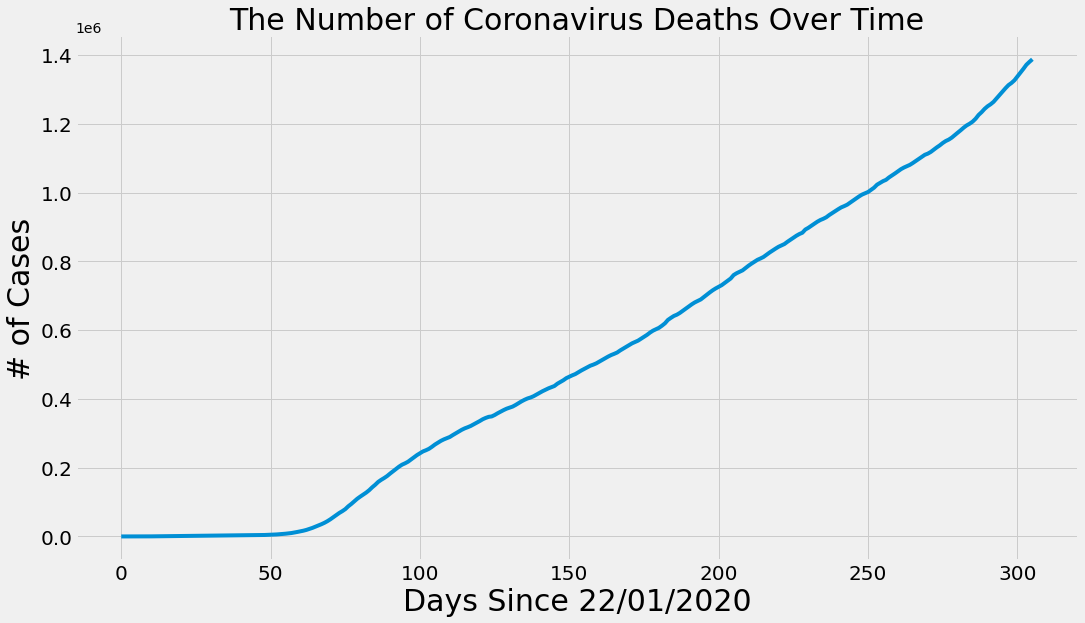

In [10]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_cases)
plt.title('The Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 22/01/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('The Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 22/01/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('The Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 22/01/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('The Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 22/01/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

fig = plt.figure(figsize=(16, 3)) # create figure



ax0 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot)
ax2 = fig.add_subplot(2,2,3) # add subplot 2 (1 row, 2 columns, second plot)
ax3 = fig.add_subplot(2,2,4) # add subplot 2 (1 row, 2 columns, second plot)

ax0.plot(adjusted_dates, total_cases)
ax0.set_title('Total cases', size=15)
ax0.set_xlabel('Days Since 22/01/2020', size=25)
ax0.set_ylabel('# of Cases', size=15)



ax1.plot(adjusted_dates, total_deaths)
#ax1.plot(kind='line', adjusted_dates, total_cases, figsize=(20, 6), ax=ax1)
ax1.set_title('Total deaths', size=15)
ax1.set_xlabel('Days Since 22/01/2020', size=15)
ax1.set_ylabel('# of Cases', size=15)

ax2.plot(adjusted_dates, total_recovered)
ax2.set_title('Total Recoveries', size=15)
ax2.set_xlabel('Days Since 22/01/2020', size=15)
ax2.set_ylabel('# of Cases', size=30)

ax3.plot(adjusted_dates, total_active)
ax3.set_title('Total active', size=15)
ax3.set_xlabel('Days Since 22/01/2020', size=15)
ax3.set_ylabel('# of Cases', size=15)



plt.show()

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [44]:
#Insert your code here
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else: d.append(data[i]-data[i-1])   
    return d

inc_total_cases = daily_increase(total_cases)

# deaths
inc_total_deaths = daily_increase(total_deaths)

# recoveries
inc_total_recovered = daily_increase(total_recovered)

inc_total_active = daily_increase(total_active)

print(inc_total_cases)

[555, 99, 287, 493, 684, 809, 2651, 589, 2068, 1692, 2111, 4749, 3100, 4011, 3745, 3160, 3593, 2734, 3030, 2609, 2042, 418, 15153, 6527, 2142, 2184, 2035, 1882, 500, 560, 629, 1761, 380, 564, 853, 977, 1360, 1385, 1893, 2383, 1978, 2584, 2317, 2764, 4000, 4062, 3960, 3963, 5011, 7681, 5789, 14381, 11078, 11293, 14744, 15931, 19533, 27156, 30635, 31969, 34261, 43379, 41507, 51025, 62673, 65031, 67392, 59347, 65310, 76777, 76590, 81329, 83226, 80371, 71989, 73221, 77752, 84210, 86414, 87489, 76166, 95321, 70163, 71319, 82030, 96799, 87676, 73470, 79980, 74501, 75901, 78036, 87996, 84372, 83452, 71935, 69718, 75479, 77455, 83386, 87237, 79982, 76514, 77080, 80479, 89900, 89021, 91147, 84914, 75230, 76897, 84262, 84844, 96616, 96385, 94225, 77625, 88706, 97244, 102368, 106805, 105992, 104569, 94397, 86471, 93191, 103003, 119502, 120925, 137029, 106503, 95158, 121457, 118233, 126913, 131144, 134431, 111845, 102541, 124739, 134698, 138025, 128649, 135418, 132403, 119406, 141797, 143152, 1400

# Problem 5

    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.
    
 
  

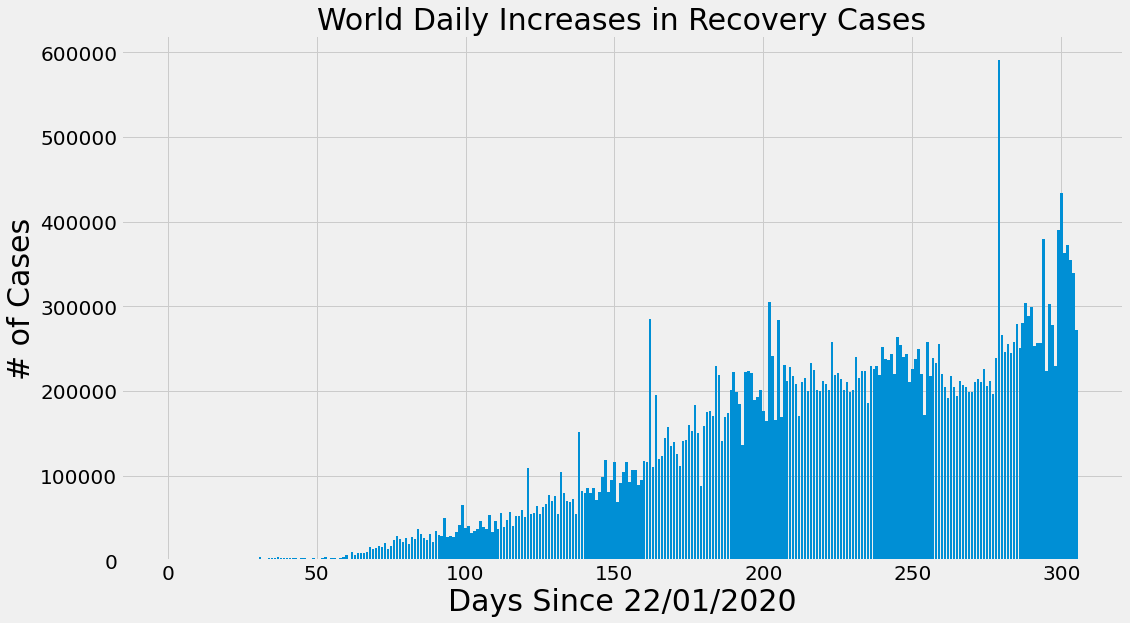

In [12]:
#Insert your code here:



plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, inc_total_cases)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 22/01/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, inc_total_deaths)
plt.title('World Daily Increases in Deaths Cases', size=30)
plt.xlabel('Days Since 22/01/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, inc_total_recovered)
plt.title('World Daily Increases in Recovery Cases', size=30)
plt.xlabel('Days Since 22/01/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, inc_total_active)
plt.title('World Daily Increases in Active Cases', size=30)
plt.xlabel('Days Since 22/01/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()



# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [13]:
#Insert your code here:
mortality_rate = []
recovery_rate = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum * 100)
    recovery_rate.append(recovered_sum/confirmed_sum * 100)



# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

In [14]:
#Insert your code here:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(12, 3))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=15)
plt.legend(['mortality rate', 'y='+str(round(mean_mortality_rate,3))], prop={'size': 10})
plt.xlabel('Days Since 22/01/2020', size=15)
plt.ylabel('Mortality Rate', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

**7.2** 

    Visualize the **recovery rate** in by time (day units) using the line chart.

    Using the dashline to visualize the average **recovery rate** of all the time.

In [15]:
#Insert your code here:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(12, 3))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=15)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 10})
plt.xlabel('Days Since 22/01/2020', size=15)
plt.ylabel('Recovery Rate', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

#  5. Continent Analysis

## Data Prerocessing

In [16]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [17]:
confirmed_df.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
deaths_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
recoveries_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries2[:]])
confirmed_df.head()

Province/State Country/Region continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  11/13/20  11/14/20  11/15/20  \
0        0        0        0        0  ...     42969     43035     43240   
1        0        0        0        0  ...     26701     27233     27830   
2        0        0        0        0  ...     65975     66819     67679   
3        0        0        0        0  ...      5725      5725      5872   
4        0        0        0        0  ...     13228     13374     13451   

   11/16/20  11/17/20  11/18/20  11/19/20  11/20/20  11/21/20  11/22/20  
0     43403     43628     43851     44228     44443     44503     44706  
1     28432     29126     29837     30623     31459     32196     32761  
2     68589     69591     70629     71652     72755     73774     74862  
3      5914      5951      6018      6066      6142      6207      6256  
4     13615     13818     13922     14134     14267     14413     14493  

[5 rows x 311 columns]

#Insert your code here:
confirm_continent = []
deaths_continent = []
recoveries_continent = []
for i in countries:
    confirm_continent.append(country_to_continent_code(i))
for j in countries1:
    deaths_continent.append(country_to_continent_code(j))
for k in countries2:
    recoveries_continent.append(country_to_continent_code(k))
    
confirmed_df['continent2'] = confirm_continent
deaths_df['continent2'] = deaths_continent
recoveries_df['continent2'] = recoveries_continent

confirmed_df.drop(['continent'],axis=1)
deaths_df.drop(['continent'],axis=1)
recoveries_df.drop(['continent'],axis=1)


confirmed_df.head()
                



# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [18]:
#Insert your code here:

countries_df = confirmed_df.groupby('Country/Region').mean()[['Lat', 'Long']]
countries_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries_df.index])
countries_df['Confirmed'] = confirmed_df.groupby('Country/Region').sum().iloc[:,-1]
countries_df['Deaths'] = deaths_df.groupby('Country/Region').sum().iloc[:,-1]
countries_df['Recoveries'] = recoveries_df.groupby('Country/Region').sum().iloc[:,-1]
countries_df['Active'] = countries_df['Confirmed'] - countries_df['Recoveries'] - countries_df['Deaths']
countries_df['Mortality Rate'] = round(countries_df['Deaths']/countries_df['Confirmed'] * 100, 2)
countries_df.head()

Lat       Long continent  Confirmed  Deaths  Recoveries  \
Country/Region                                                                 
Afghanistan     33.93911  67.709953      Asia      44706    1687       35934   
Albania         41.15330  20.168300    Europe      32761     699       15842   
Algeria         28.03390   1.659600    Africa      74862    2272       48794   
Andorra         42.50630   1.521800    Europe       6256      76        5358   
Angola         -11.20270  17.873900    Africa      14493     337        7346   

                Active  Mortality Rate  
Country/Region                          
Afghanistan       7085            3.77  
Albania          16220            2.13  
Algeria          23796            3.03  
Andorra            822            1.21  
Angola            6810            2.33

# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [19]:
#Insert your code here:
continents_df = countries_df.copy().drop(['Lat', 'Long'], axis = 1).groupby(["continent"]).sum()
continents_df["Mortality Rate"] = np.round(100*continents_df["Deaths"]/continents_df["Confirmed"],2)
continents_df.head()

Confirmed  Deaths  Recoveries   Active  Mortality Rate
continent                                                            
Africa           2070162   49718     1744090   276354            2.40
Asia            15640785  275789    14053932  1311064            1.76
Australia          30524     941       28105     1478            3.08
Europe          15663196  355248     5745494  9562454            2.27
North America   14358719  386011     6130191  7842517            2.69

## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [20]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

In [21]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


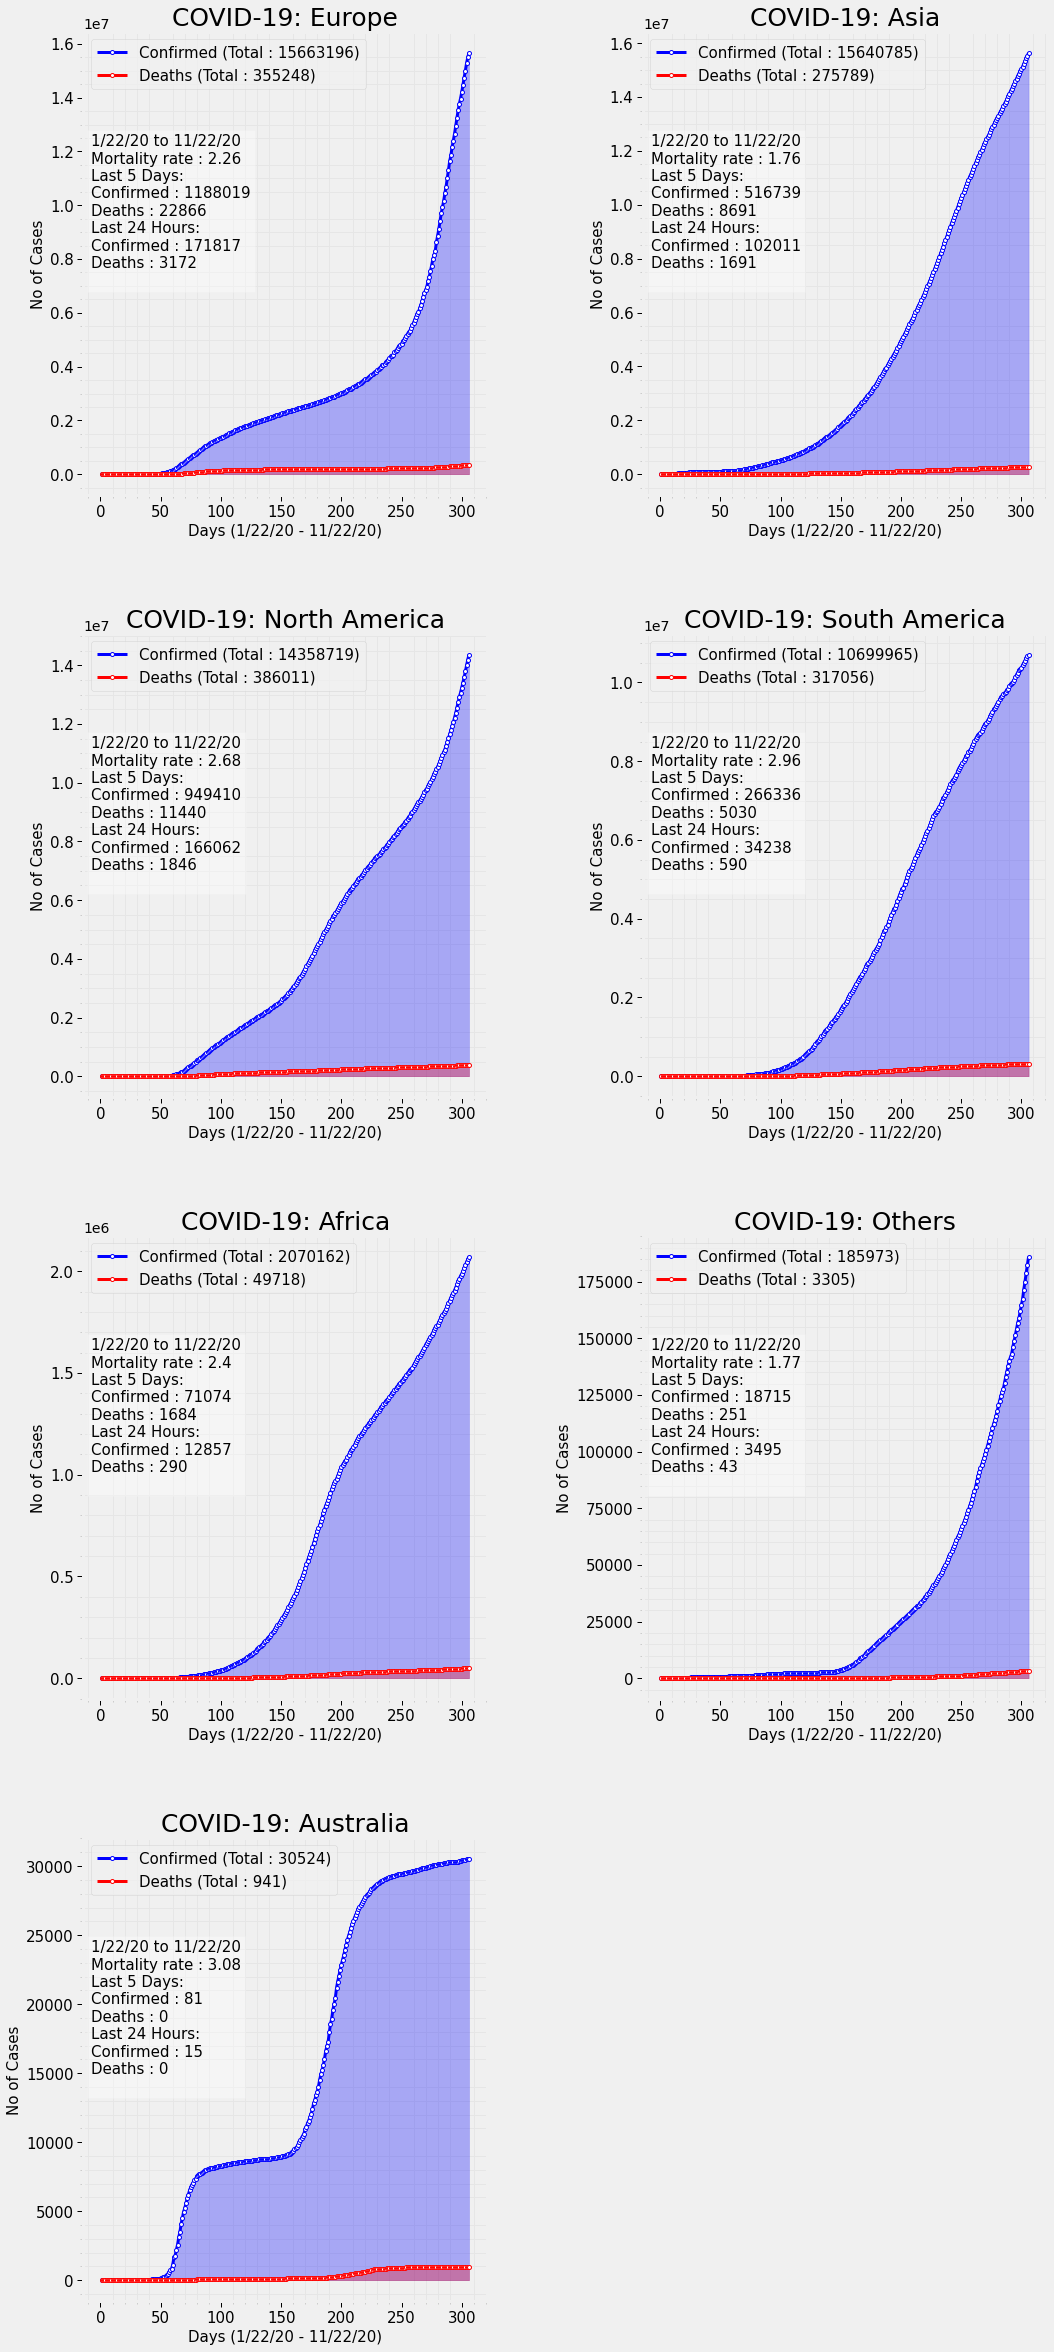

In [22]:
# Insert your code here:
continents = continents_df.sort_values(continents_df.columns[0],ascending = False).index
#print(continents)
cols =2
rows = int(np.ceil(len(continents)/cols))
f = plt.figure(figsize=(18,9*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases(confirmed_df, deaths_df, continent = continent,figure = [f,rows,cols, i+1])
plt.show()


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

In [23]:
#Insert your code here:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases_2(confirmed, deaths,recoveries,
                          continent = None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]), axis =0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()





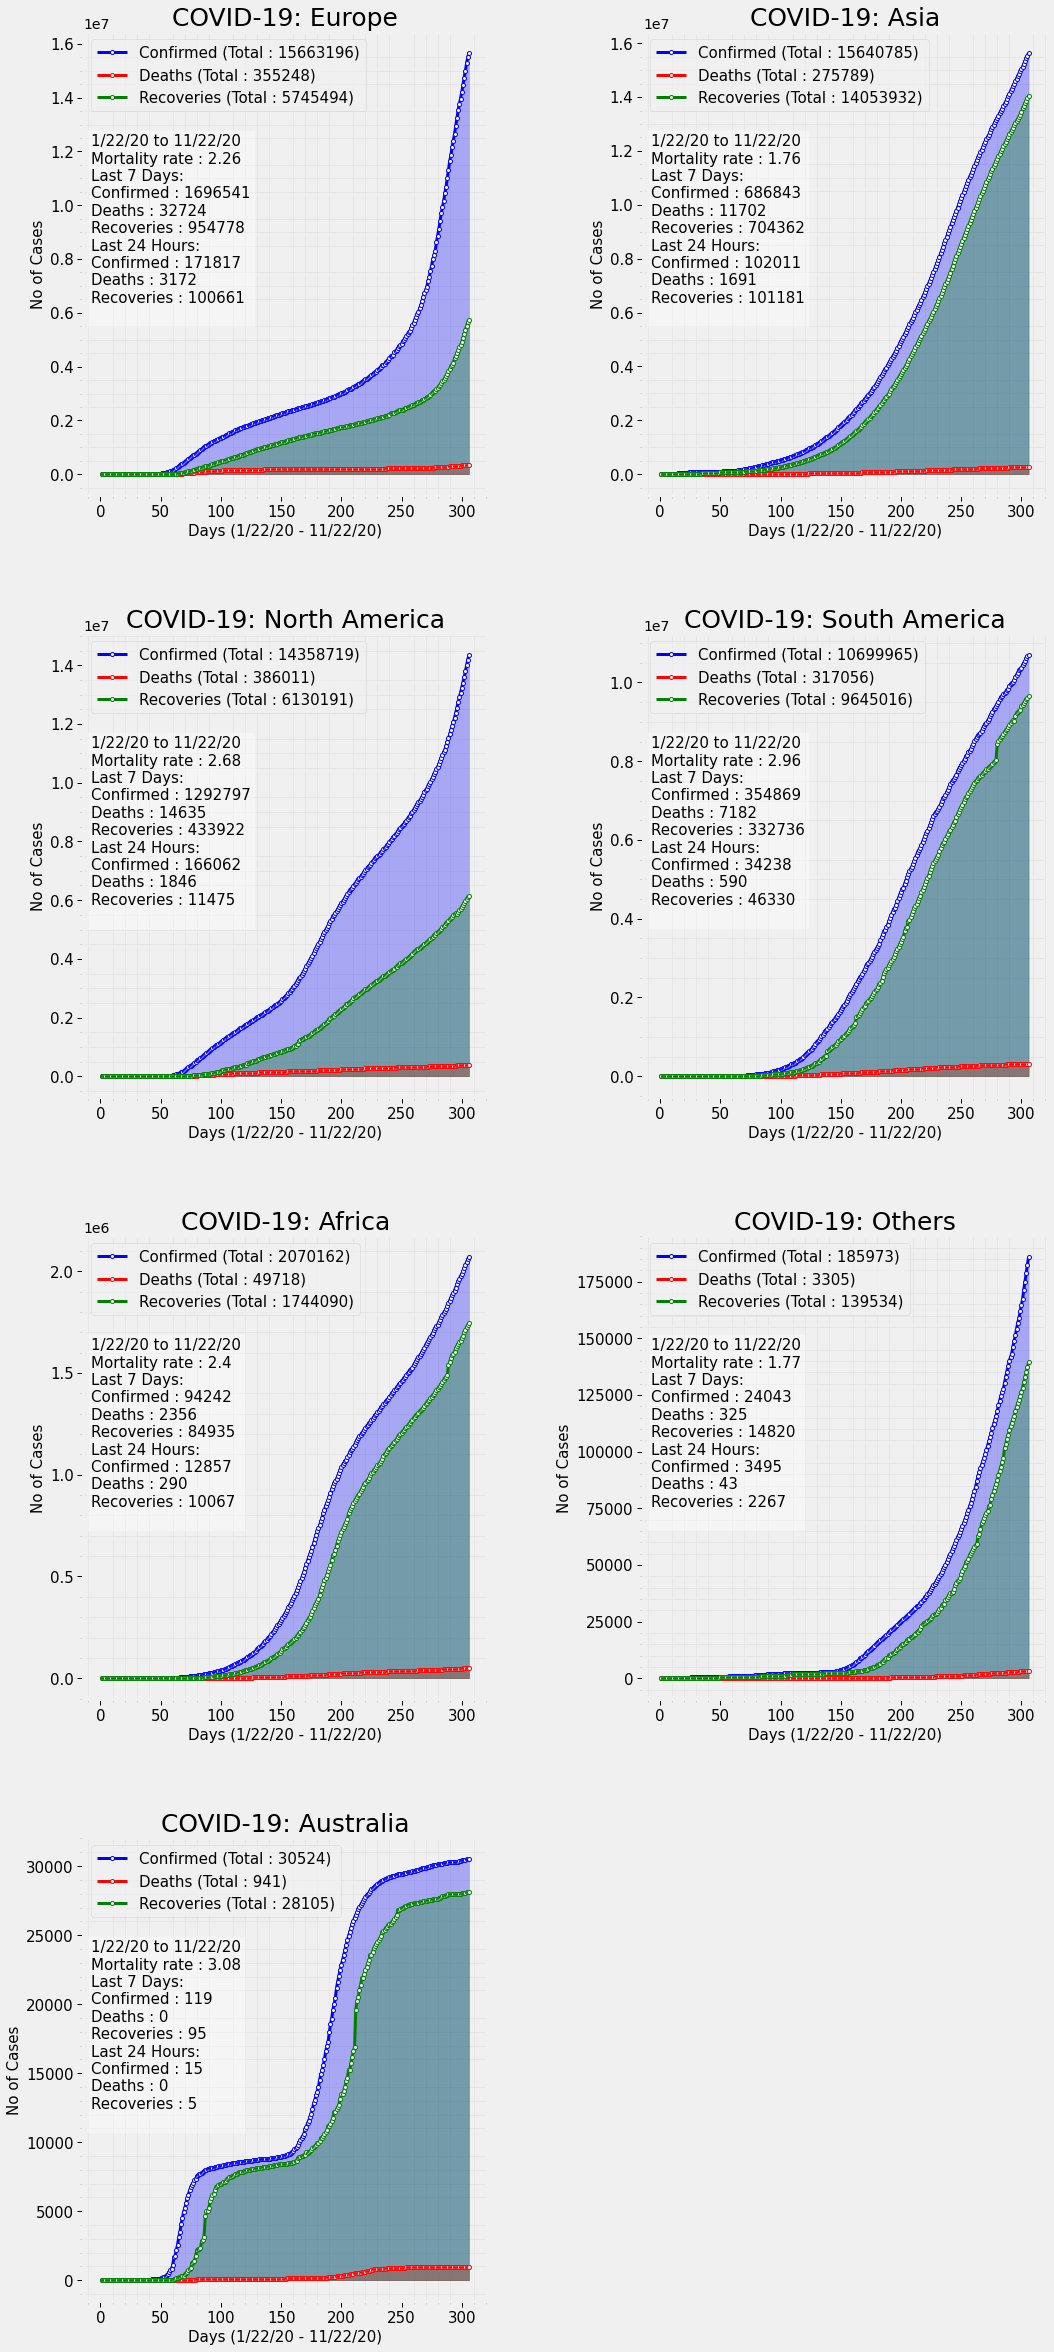

In [24]:

#Insert your code here:
continents = continents_df.sort_values(continents_df.columns[0],ascending = False).index

#print(continents)
cols =2
rows = int(np.ceil(len(continents)/cols))
f = plt.figure(figsize=(18,9*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases_2(confirmed_df, deaths_df, recoveries_df, continent = continent,figure = [f,rows,cols, i+1])

plt.show()


# Problem 12
    Visualize the covariance matrix for continents_df.

<AxesSubplot:>

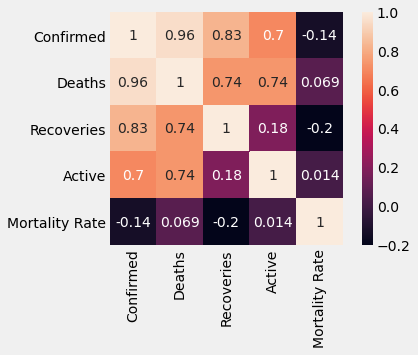

In [25]:
#Insert your code here:
matrix = np.triu(continents_df.corr())
sns.heatmap(continents_df.corr(), annot=True, square = True)

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

In [26]:
#Insert your code here:
labels= list(continents_df.index.values)
name_pie = ['Confirmed','Deaths', 'Recoveries','Active']
for name in name_pie:
    value= list(continents_df[name].values)
    fig = go.Figure(data=[go.Pie(labels=labels, values=value
                    , hole=.3)])
    fig.update_layout( title="World Total "+name+" COVID-19 Cases by Continents: "+ str(sum(value)))
    fig.show()

# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [27]:
#Insert your code here:
world_map = folium.Map()
world_map.zoom_start = 4
country_name= list(countries_df.index.values)
country_confirm= list(countries_df['Confirmed'].values)
country_deaths= list(countries_df['Deaths'].values)
country_recoveries= list(countries_df['Recoveries'].values)
country_rate= list(countries_df['Mortality Rate'].values)
lats= list(countries_df['Lat'].values)
lons= list(countries_df['Long'].values)
for lat, lng, name, confirm, death, recover, rate  in zip(lats, lons, country_name, country_confirm, country_deaths, country_recoveries, country_rate):
    popup_text = "{}<br> Confirm: {:,}<br> Death: {:,}<br> Recoveries: {:,}<br> Mortality Rate: {:,}"
    popup_text = popup_text.format(
                      name, confirm, death, recover, rate
                      )
    folium.CircleMarker(
        [lat, lng],
        radius=int(np.log10(confirm)*2), # define how big you want the circle markers to be
        color='orange',
        fill=True,
        popup = popup_text,
        # popup=name+"\nConfirmed: "+str(confirm)+"\nDeaths: "+str(death)+"\nRecoveries: "+str(recover)+"\nMortality Rate: "+str(rate),
        fill_opacity=0.1
        
    ).add_to(world_map)

world_map




# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [28]:
px_data={
    'Country': country_name,
    'Confirmed_log10': np.log10(country_confirm)
}
px_df = pd.DataFrame(px_data,columns=['Country','Confirmed_log10'])
fig = px.bar(px_df, x="Country", y="Confirmed_log10")
fig.show()

#Insert your code here:

temp_df = pd.DataFrame(countries_df['Active'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="Country/Region",
                    color=np.log10(temp_df["Active"]), # lifeExp is a column of gapminder
                    hover_name="Country/Region", # column to add to hover information
                    hover_data=["Active"],
                    
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Active Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Active Cases(Log Scale)",colorscale="spectral")
# fig.to_image("Global Heat Map confirmed.png")
fig.show()


# Problem 16
    Filter the top 10 countries baseđ on the number of confirmed cases.

In [29]:
#Insert your code here:
top_10_countries = list(countries_df.sort_values('Confirmed')["Confirmed"].index[-10:][::-1])
top10_countries_df = countries_df.loc[top_10_countries]
top10_countries_df

Lat        Long      continent  Confirmed  Deaths  \
Country/Region                                                            
USA             40.000000 -100.000000  North America   12246849  256782   
India           20.593684   78.962880           Asia    9139865  133738   
Brazil         -14.235000  -51.925300  South America    6071401  169183   
France           8.308854    5.458262         Europe    2191180   48807   
Russia          61.524010  105.318756         Europe    2071858   35838   
Spain           40.463667   -3.749220         Europe    1556730   42619   
United Kingdom  24.548173  -43.902242         Europe    1515802   55120   
Italy           41.871940   12.567380         Europe    1408868   49823   
Argentina      -38.416100  -63.616700  South America    1370366   37002   
Colombia         4.570900  -74.297300  South America    1248417   35287   

                Recoveries   Active  Mortality Rate  
Country/Region                                       
USA                4526513  7463554            2.10  
India              8562641   443486            1.46  
Brazil             5457973   444245            2.79  
France              157259  1985114            2.23  
Russia             1582768   453252            1.73  
Spain               150376  1363735            2.74  
United Kingdom        3322  1457360            3.64  
Italy               553098   805947            3.54  
Argentina          1195492   137872            2.70  
Colombia           1150932    62198            2.83

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [30]:
#Insert your code here:
y_Deaths = top10_countries_df['Deaths']
y_Recovered = top10_countries_df['Recoveries']
y_Active = top10_countries_df['Active']

Deaths = go.Bar(x = top10_countries_df.index, y=y_Deaths, name="Deaths")
Recovered = go.Bar(x=top10_countries_df.index, y=y_Recovered, name="Recoveries")
Active = go.Bar(x=top10_countries_df.index, y=y_Active, name="Active")

data = [Deaths, Recovered, Active]
layout = go.Layout(barmode='stack', 
    title="Top 10 Countries (Confirmed Cases)",
    yaxis={
        'title': "# active cases",
        'separatethousands': True,
    }
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

The COVID 2019 epidemic in the world has not reached its peak because the daily number of cases is increasing according to the data of Problem 5

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


The continent has the highest death rate over continents' active cases: Australia (3.09%)

The continent has the highest rate on COVID 2019 spread rate over continents' active cases: EU (15.85%)

The continent has the highest recoveries rate over continents' dataset: Australia (92.3%)

In [31]:
continent_sorted = continents_df.sort_values("Confirmed", ascending=False)

continent_sorted['Confirmed']=continent_sorted['Deaths']+continent_sorted['Recoveries']+continent_sorted['Active']
continent_sorted['Mortality Rate']=continent_sorted['Deaths']/continent_sorted['Confirmed']*100
continent_sorted['Recoveries Rate']=continent_sorted['Recoveries']/continent_sorted['Confirmed']*100
continent_sorted.sort_values(['Mortality Rate'], ascending=False).iloc[0]


Confirmed          30524.000000
Deaths               941.000000
Recoveries         28105.000000
Active              1478.000000
Mortality Rate         3.082820
Recoveries Rate       92.075088
Name: Australia, dtype: float64

In [32]:
spread_continent= confirmed_df.groupby(['continent']).sum()
spread_continent['Spread Rate']=(spread_continent.iloc[:,-1]-spread_continent.iloc[:,-10])/spread_continent.iloc[:,-1]*100
spread_continent.sort_values(['Spread Rate'], ascending=False).iloc[0]

Lat               153.715219
Long              277.387316
1/22/20             0.000000
1/23/20             0.000000
1/24/20             0.000000
                   ...      
11/19/20       174988.000000
11/20/20       178847.000000
11/21/20       182478.000000
11/22/20       185973.000000
Spread Rate        15.639905
Name: Others, Length: 309, dtype: float64

In [33]:
continent_sorted.sort_values(['Recoveries Rate'], ascending=False).iloc[0]

Confirmed          30524.000000
Deaths               941.000000
Recoveries         28105.000000
Active              1478.000000
Mortality Rate         3.082820
Recoveries Rate       92.075088
Name: Australia, dtype: float64

# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

The country has the highest death rate over countries' dataset is Yemen (29.14%)

The country has the highest rate on COVID 2019 spread rate over countries'dataset is Vanuatu (100%)

The country has the highest recoveries rate over countries' dataset is Saint Kitts and Nevis (100%)

In [34]:
countries_df['Confirmed']=countries_df['Recoveries']+countries_df['Active']+countries_df['Deaths']
countries_df['Recoveries Rate']=countries_df['Recoveries']/countries_df['Confirmed']*100
countries_df['Mortality Rate']=countries_df['Deaths']/countries_df['Confirmed']*100
countries_df.sort_values(['Mortality Rate'], ascending=False).iloc[0]


Lat                15.5527
Long               48.5164
continent             Asia
Confirmed             2099
Deaths                 608
Recoveries            1448
Active                  43
Mortality Rate     28.9662
Recoveries Rate    68.9852
Name: Yemen, dtype: object

In [35]:
country_spread=confirmed_df.groupby(['Country/Region']).sum()
country_spread['Spread Rate']=(country_spread.iloc[:,-1]-country_spread.iloc[:,-10])/country_spread.iloc[:,-1]*100

country_spread.sort_values(['Spread Rate'], ascending=False).iloc[0]

Lat              7.1315
Long           171.1845
1/22/20          0.0000
1/23/20          0.0000
1/24/20          0.0000
                 ...   
11/19/20         4.0000
11/20/20         4.0000
11/21/20         4.0000
11/22/20         4.0000
Spread Rate     75.0000
Name: Marshall Islands, Length: 309, dtype: float64

In [36]:
countries_df.sort_values(['Recoveries Rate'], ascending=False).iloc[0]


Lat               -8.87422
Long               125.728
continent           Others
Confirmed               30
Deaths                   0
Recoveries              30
Active                   0
Mortality Rate           0
Recoveries Rate        100
Name: Timor-Leste, dtype: object

# Problem 21
**USA dataset**

In [37]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

In [38]:
us_medical_data = us_medical_data.fillna(0)
us_medical_data.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-07-07 04:34:13  32.3182  -86.9023   
1          Alaska             US  2020-07-07 04:34:13  61.3707 -152.4044   
2  American Samoa             US  2020-07-07 04:34:13 -14.2710 -170.1320   
3         Arizona             US  2020-07-07 04:34:13  33.7298 -111.4312   
4        Arkansas             US  2020-07-07 04:34:13  34.9697  -92.3731   

   Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0      44932    1007    22082.0  21789.0     1     915.282617       455095.0   
1       1162      16      548.0    598.0     2     158.841903       123753.0   
2          0       0        0.0      0.0    60       0.000000          696.0   
3     101455    1829    11836.0  87790.0     4    1393.858286       617841.0   
4      24253     292    17834.0   6127.0     5     803.663856       344968.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0               2914.0        2.243861  84000001  USA   9281.620008   
1                  0.0        1.376936  84000002  USA  16916.662680   
2                  0.0        0.000000        16  ASM   1250.876152   
3               5188.0        1.802770  84000004  USA   8488.322873   
4               1575.0        1.203975  84000005  USA  11431.093603   

   Hospitalization_Rate  
0              6.493159  
1              0.000000  
2              0.000000  
3              5.113597  
4              6.494042

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [39]:
#Insert your code here:
#Insert your code here:
#21.1
highest_death_rate = us_medical_data.loc[:, ["Province_State","Mortality_Rate"] ].nlargest(1,["Mortality_Rate"])
print("21.1: State has highest death rate")
print(highest_death_rate.values)
print()
#21.2
highest_spread_rate = us_medical_data.loc[:, ["Province_State","Incident_Rate"] ].nlargest(1,["Incident_Rate"])
print("21.2: State has highest spread rate")
print(highest_spread_rate.values)
print()
#21.3
print("21.3: State has highest recoveries rate")
us_medical_data["recoveries_rate"]=us_medical_data["Recovered"]/us_medical_data["Confirmed"]*100
highest_recoveries_rate = us_medical_data.loc[:, ["Province_State","recoveries_rate"] ].nlargest(1,["recoveries_rate"])
print(highest_recoveries_rate.values)

21.1: State has highest death rate
[['Connecticut' 9.234502724795641]]

21.2: State has highest spread rate
[['New York' 2044.0936237843548]]

21.3: State has highest recoveries rate
[['Minnesota' 87.91257227306905]]


# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [40]:
#Insert your code here:
us_medical_data.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2020-07-07 04:34:13  32.3182  -86.9023   
1          Alaska             US  2020-07-07 04:34:13  61.3707 -152.4044   
2  American Samoa             US  2020-07-07 04:34:13 -14.2710 -170.1320   
3         Arizona             US  2020-07-07 04:34:13  33.7298 -111.4312   
4        Arkansas             US  2020-07-07 04:34:13  34.9697  -92.3731   

   Confirmed  Deaths  Recovered   Active  FIPS  Incident_Rate  People_Tested  \
0      44932    1007    22082.0  21789.0     1     915.282617       455095.0   
1       1162      16      548.0    598.0     2     158.841903       123753.0   
2          0       0        0.0      0.0    60       0.000000          696.0   
3     101455    1829    11836.0  87790.0     4    1393.858286       617841.0   
4      24253     292    17834.0   6127.0     5     803.663856       344968.0   

   People_Hospitalized  Mortality_Rate       UID ISO3  Testing_Rate  \
0               2914.0        2.243861  84000001  USA   9281.620008   
1                  0.0        1.376936  84000002  USA  16916.662680   
2                  0.0        0.000000        16  ASM   1250.876152   
3               5188.0        1.802770  84000004  USA   8488.322873   
4               1575.0        1.203975  84000005  USA  11431.093603   

   Hospitalization_Rate  recoveries_rate  
0              6.493159        49.145375  
1              0.000000        47.160069  
2              0.000000              NaN  
3              5.113597        11.666256  
4              6.494042        73.533171

In [41]:
from mpl_toolkits.mplot3d import Axes3D
def drawPlane(model, X_test, y_test, title, R2):
    # This convenience method will take care of plotting your
    # test observations, comparing them to the regression plane,
    # and displaying the R2 coefficient
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_zlabel('prediction')

    
    # You might have passed in a DataFrame, a Series (slice),
    # an NDArray, or a Python List... so let's keep it simple:
    X_test = np.array(X_test)
    col1 = X_test[:,0]
    col2 = X_test[:,1]

    
    # Set up a Grid. We could have predicted on the actual
    # col1, col2 values directly; but that would have generated
    # a mesh with WAY too fine a grid, which would have detracted
    # from the visualization
    x_min, x_max = col1.min(), col1.max()
    y_min, y_max = col2.min(), col2.max()
    x = np.arange(x_min, x_max, (x_max-x_min) / 10)
    y = np.arange(y_min, y_max, (y_max-y_min) / 10)
    x, y = np.meshgrid(x, y)

    
    # Predict based on possible input values that span the domain
    # of the x and y inputs:
    z = model.predict(  np.c_[x.ravel(), y.ravel()]  )
    z = z.reshape(x.shape)

    
    ax.scatter(col1, col2, y_test, c='g', marker='o')
    ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)

    plt.show()

In [42]:
X= us_medical_data.sort_values(by=['Confirmed'], ignore_index=True)
from sklearn import linear_model
model = linear_model.LinearRegression()
from sklearn.model_selection import train_test_split
X_abc = np.asanyarray(X[["People_Hospitalized","People_Tested","Testing_Rate"]])
y_acc= np.asanyarray(X["Confirmed"])
X_train, X_test, y_train, y_test = train_test_split( X_abc, y_acc, test_size=10/57, shuffle = False)

X_train=X_train.reshape(-1,3)
X_test=X_test.reshape(-1, 3)
y_train= y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

model.fit(X_train, y_train)
score= model.score(X_test, y_test)
score



0.801972166070878

Confirmed R2: 0.797666853367451
Intercept(s):  [-388.11844721]


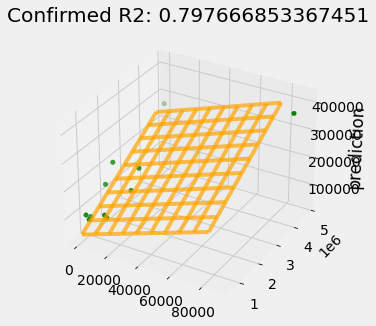

In [43]:
X= us_medical_data.sort_values(by=['Confirmed'], ignore_index=True)
from sklearn import linear_model
model2 = linear_model.LinearRegression()
from sklearn.model_selection import train_test_split
X_abc = np.asanyarray(X[["People_Hospitalized","People_Tested"]])
y_acc= np.asanyarray(X["Confirmed"])
X_train, X_test, y_train, y_test = train_test_split( X_abc, y_acc, test_size=10/57, shuffle = False)

X_train=X_train.reshape(-1,2)
X_test=X_test.reshape(-1, 2)
y_train= y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

model2.fit(X_train, y_train)
score= model2.score(X_test, y_test)
drawPlane(model2, X_test, y_test, 'Confirmed',score)

